bucket where data resides (URI) s3://hugging-face-text-multiclass-text-classification-bucket/training_data/newsCorpora.csv

In [1]:
s3_path = 's3://hugging-face-text-multiclass-text-classification-bucket/training_data/newsCorpora.csv'

In [3]:
import pandas as pd
df = pd.read_csv(s3_path, sep='\t', names=['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP'])

In [4]:
df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422419 entries, 0 to 422418
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ID         422419 non-null  int64 
 1   TITLE      422419 non-null  object
 2   URL        422419 non-null  object
 3   PUBLISHER  422417 non-null  object
 4   CATEGORY   422419 non-null  object
 5   STORY      422419 non-null  object
 6   HOSTNAME   422419 non-null  object
 7   TIMESTAMP  422419 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 25.8+ MB


In [17]:
df_work = df.copy()

In [18]:
df_work=df_work[['TITLE', 'CATEGORY']]

In [19]:
df_work

,TITLE,CATEGORY
0,"Fed official says weak data caused by weather,...",b
1,Fed's Charles Plosser sees high bar for change...,b
2,US open: Stocks fall after Fed official hints ...,b
3,"Fed risks falling 'behind the curve', Charles ...",b
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b
...,...,...
422414,Surgeons to remove 4-year-old's rib to rebuild...,m
422415,Boy to have surgery on esophagus after battery...,m
422416,Child who swallowed battery to have reconstruc...,m
422417,Phoenix boy undergoes surgery to repair throat...,m


In [20]:
my_dict = {
    'e':'Entertainment',
    'b':'Business',
    't':'Science',
    'm':'Health'
}

In [21]:
# Change the 'CATEGORY' columns' cryptic symbols to accord with more readable dictionary. x in the function represents symbols
def update_category(x):
    return my_dict[x]

In [22]:
# Update the CATEGORY column
df_work['CATEGORY'] = df_work['CATEGORY'].apply(lambda x: update_category(x))

# Display the updated DataFrame
print(df_work)

# Optionally, to see the unique values in the CATEGORY column:
unique_names = df_work['CATEGORY'].unique()
print(unique_names)


                                                    TITLE  CATEGORY
0       Fed official says weak data caused by weather,...  Business
1       Fed's Charles Plosser sees high bar for change...  Business
2       US open: Stocks fall after Fed official hints ...  Business
3       Fed risks falling 'behind the curve', Charles ...  Business
4       Fed's Plosser: Nasty Weather Has Curbed Job Gr...  Business
...                                                   ...       ...
422414  Surgeons to remove 4-year-old's rib to rebuild...    Health
422415  Boy to have surgery on esophagus after battery...    Health
422416  Child who swallowed battery to have reconstruc...    Health
422417  Phoenix boy undergoes surgery to repair throat...    Health
422418  Phoenix boy undergoes surgery to repair throat...    Health

[422419 rows x 2 columns]
['Business' 'Science' 'Entertainment' 'Health']


In [24]:
import random

def get_random_title_by_category(category):
    filtered_df = df_work[df_work['CATEGORY']==category]
    
    return filtered_df['TITLE'].sample().values[0]

category= 'Health'

random_title = get_random_title_by_category(category)

print(random_title)
                          

Your iPad may be giving you a rash


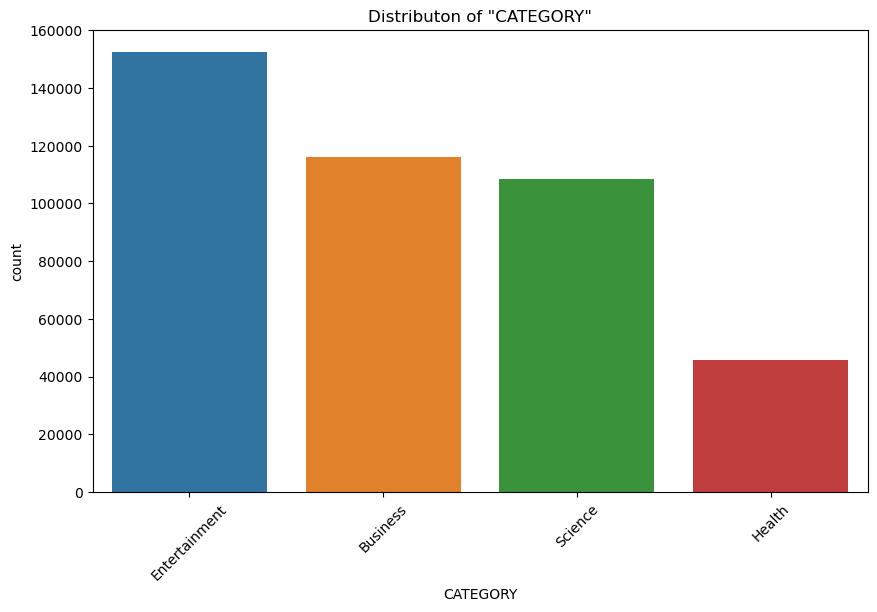

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make bar chart
plt.figure(figsize=(10,6))
sns.countplot(data=df_work, x='CATEGORY', order=df_work['CATEGORY'].value_counts().index)
plt.title('Distributon of "CATEGORY"')
plt.xticks(rotation=45)
plt.show()

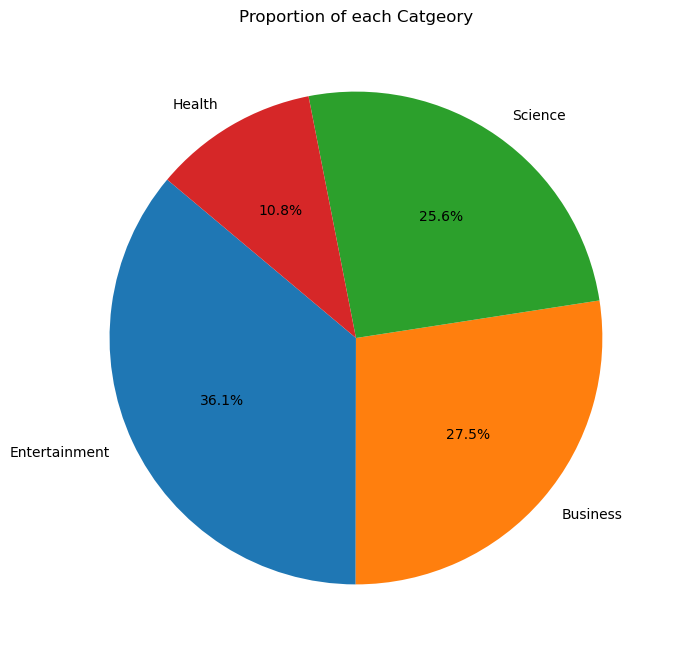

In [30]:
# Make pie-chart
category_counts=df_work['CATEGORY'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(category_counts,labels=category_counts.index,autopct='%1.1f%%',startangle=140)
plt.title("Proportion of each Catgeory")
plt.show()
          
          

## Save notebook in s3 bucket
save money by not having the domain constantly open if there are breaks between days

In [34]:
import boto3

# Initialize the S3 client
s3 = boto3.client('s3')

# Define bucket name and file path
bucket_name = 'hugging-face-text-multiclass-text-classification-bucket'
notebook_path = '/root/EDAMultiClassTextClassification.ipynb'  # Updated with the correct path
notebook_name = notebook_path.split('/')[-1]   # Extracts file name, e.g., "EDAMultiClassTextClassification.ipynb"

# Upload the notebook file to S3
s3.upload_file(notebook_path, bucket_name, f'training_data/notebooks/{notebook_name}')

print(f'Notebook {notebook_name} has been uploaded to S3 bucket \"{bucket_name}\" under \"training_data/notebooks\" folder.')


Notebook EDAMultiClassTextClassification.ipynb has been uploaded to S3 bucket "hugging-face-text-multiclass-text-classification-bucket" under "training_data/notebooks" folder.


In [32]:
!pwd


/root


In [33]:
!ls -R /root


/root:
EDAMultiClassTextClassification.ipynb
